In [1]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.preprocessing import Imputer
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [2]:
pip install pydotplus
pip install -U imbalanced-learn

SyntaxError: invalid syntax (<ipython-input-2-2ee933e37f5d>, line 1)

In [4]:
data = pd.read_csv("MVC.csv")
print(data.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'NUMTIME'],
      dtype='object')


In [3]:
feature_cols = data.columns[4]
resp_col = data.columns[11]
x = data[feature_cols].copy()
y = data[resp_col].copy()

In [ ]:
def borough(x):
    if x=="QUEENS":
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5

In [3]:
data['BOROUGH2']=data['BOROUGH'].apply(borough)
print(borough)

NameError: name 'data' is not defined

In [4]:
valuablecols=['NUMTIME','BOROUGH']
def replace_missing_value(data, valuablecols):

    imputer = Imputer(strategy="median")
    df_num = data[valuablecols]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def
data["NUMTIME"] = replace_missing_value(data,["NUMTIME"])
data = data.dropna(how='any', subset=['BOROUGH','NUMTIME','NUMBER OF PERSONS INJURED','LONGITUDE','LATITUDE','CONTRIBUTING FACTOR VEHICLE 1'])
print(data.isnull().any())

NameError: name 'data' is not defined

In [9]:
def injured_to_binary(x):
        if x>= 1:
            return 1
        else:
            return 0
data['affected']=data['NUMBER OF PERSONS INJURED']+data['NUMBER OF PERSONS KILLED']
data['affected'] = data['affected'].apply(injured_to_binary)
data['NUMBER OF MOTORIST INJURED'] = data['NUMBER OF MOTORIST INJURED'].apply(injured_to_binary)
data['NUMBER OF PEDESTRIANS INJURED'] = data['NUMBER OF PEDESTRIANS INJURED'].apply(injured_to_binary)
data['NUMBER OF CYCLIST INJURED'] = data['NUMBER OF CYCLIST INJURED'].apply(injured_to_binary)

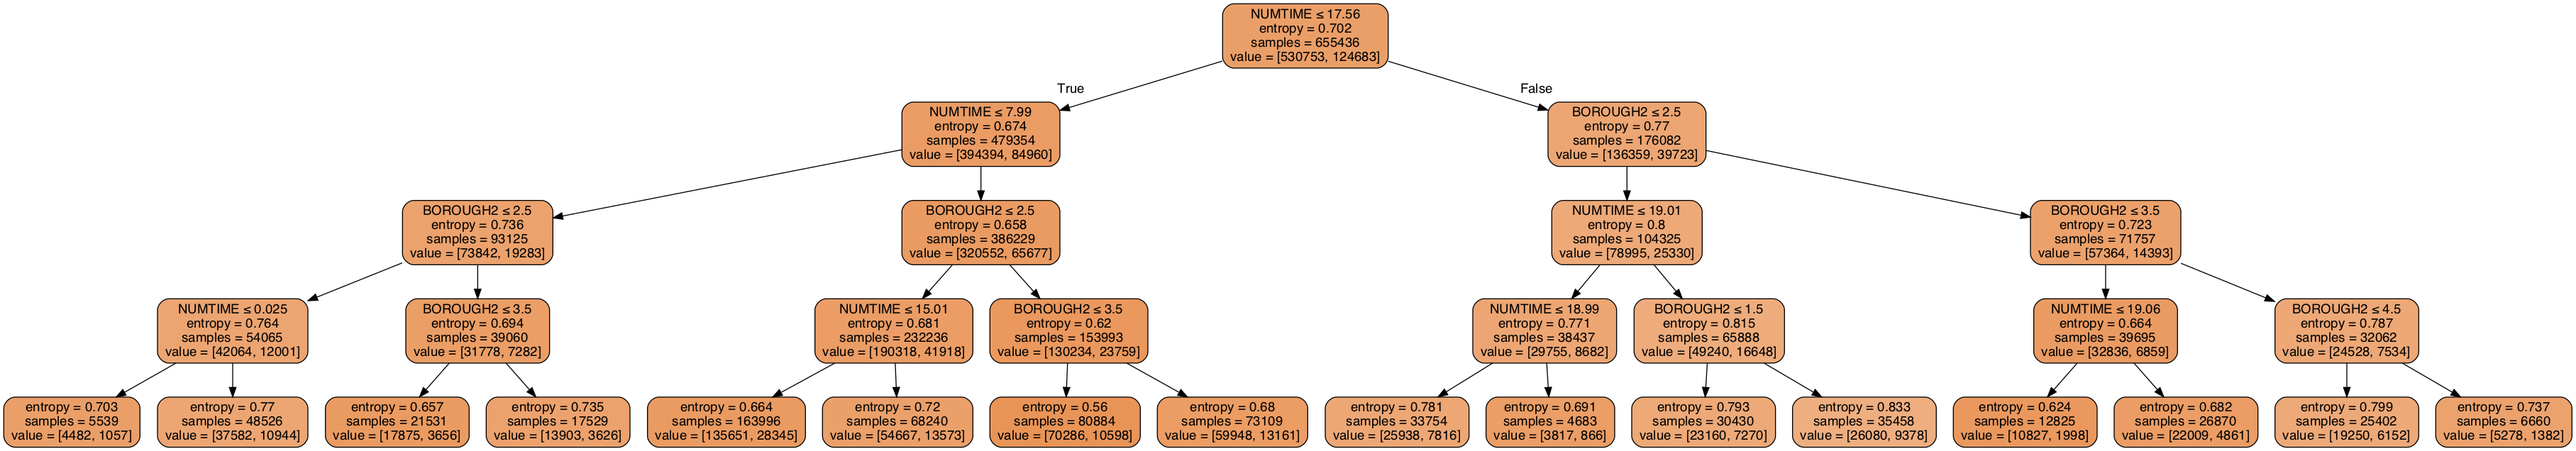

In [10]:
X_feat = data[['NUMTIME','BOROUGH2']]
y = data['affected']
t = DecisionTreeClassifier(max_depth=4,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [65]:
X_feat = data[['NUMTIME','BOROUGH2']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.810997
2   0.810997
3   0.810997
4   0.810997
5   0.810997
10  0.810883
15  0.810585
20  0.810471
25  0.810379
30  0.810219


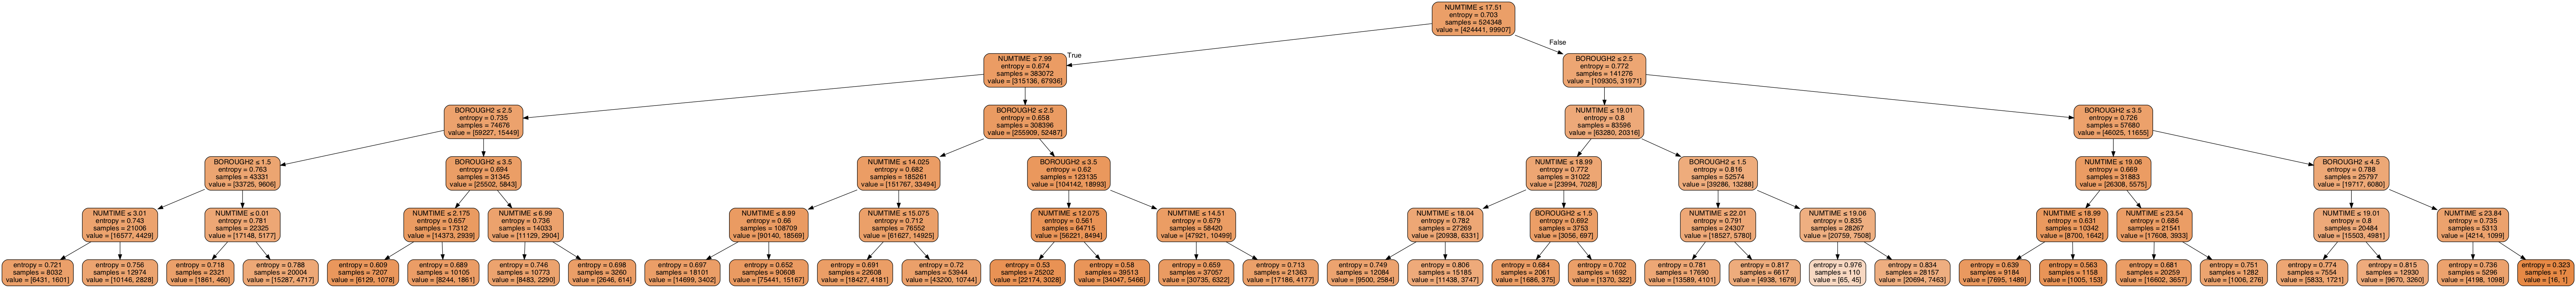

In [66]:
t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [67]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH2'], 'importance':t.feature_importances_})


feature  importance
0   NUMTIME    0.591535
1  BOROUGH2    0.408465

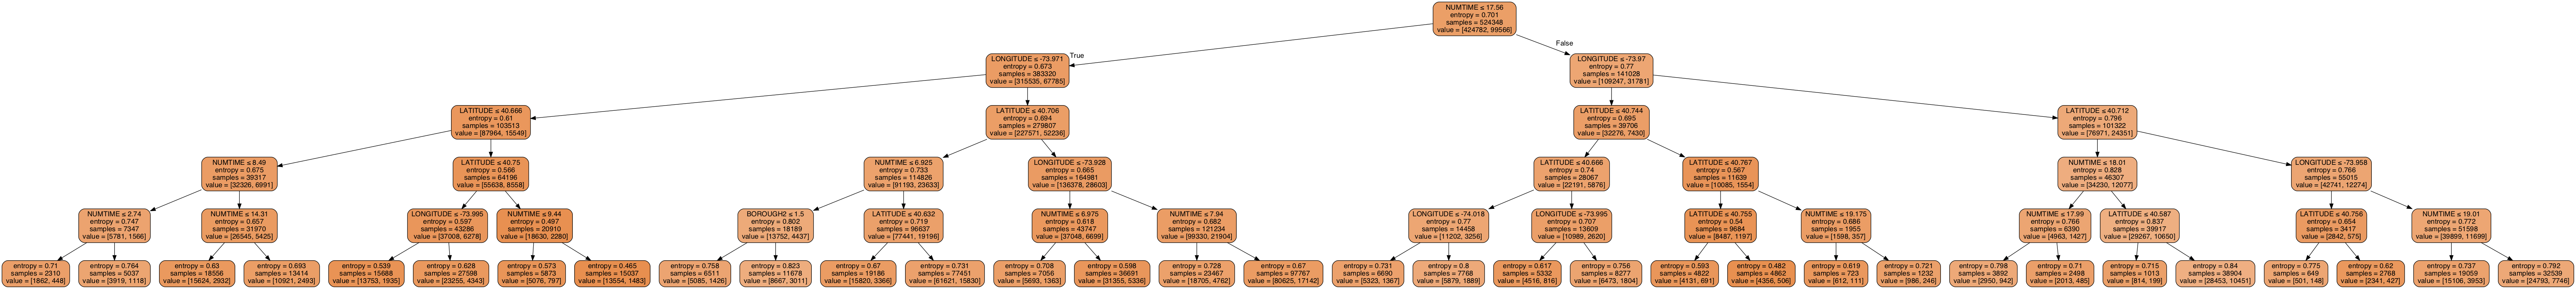

In [15]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=5,criterion='entropy')

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
pd.DataFrame({'feature':['NUMTIME','BOROUGH','LATITUDE','LONGITUDE'], 'importance':t.feature_importances_})



feature  importance
0    NUMTIME    0.393684
1    BOROUGH    0.006060
2   LATITUDE    0.312177
3  LONGITUDE    0.288080

In [15]:
X_feat = data[['NUMTIME','BOROUGH2','LATITUDE','LONGITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3,4]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  7.5min finished


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               5                  1                     10   
1            gini               1                  1                     10   
2         entropy               2                  1                     60   
3         entropy               2                  2                     20   
4         entropy               2                  2                     30   
5         entropy               2                  2                     40   
6         entropy               2                  2                     50   
7         entropy               2                  2                     60   
8         entropy               2                  3                     10   
9         entropy               2                  3                     20   

   mean_test_score  
0         0.809772  
1         0.809771  
2         0.809771  
3         0.809771  
4         0.809771  
5         0.809771  
6         0.809771  
7         0.809771  
8         0.809771  
9         0.809771

In [16]:
X_feat = data[['NUMTIME','BOROUGH2']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.3min finished


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               1                  1                     10   
1         entropy               2                  1                     20   
2         entropy               3                  1                     20   
3         entropy               3                  1                     10   
4         entropy               2                  2                     60   
5         entropy               2                  2                     50   
6         entropy               2                  2                     40   
7         entropy               2                  2                     30   
8         entropy               2                  2                     20   
9         entropy               2                  2                     10   

   mean_test_score  
0         0.809771  
1         0.809771  
2         0.809771  
3         0.809771  
4         0.809771  
5         0.809771  
6         0.809771  
7         0.809771  
8         0.809771  
9         0.809771

In [17]:
X_feat = data[['NUMTIME','LATITUDE']]
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.0min finished


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               1                  1                     10   
1         entropy               3                  1                     60   
2         entropy               3                  1                     40   
3         entropy               3                  1                     30   
4         entropy               3                  1                     20   
5         entropy               3                  1                     10   
6         entropy               2                  2                     60   
7         entropy               2                  2                     50   
8         entropy               2                  2                     40   
9         entropy               2                  2                     30   

   mean_test_score  
0         0.809771  
1         0.809771  
2         0.809771  
3         0.809771  
4         0.809771  
5         0.809771  
6         0.809771  
7         0.809771  
8         0.809771  
9         0.809771

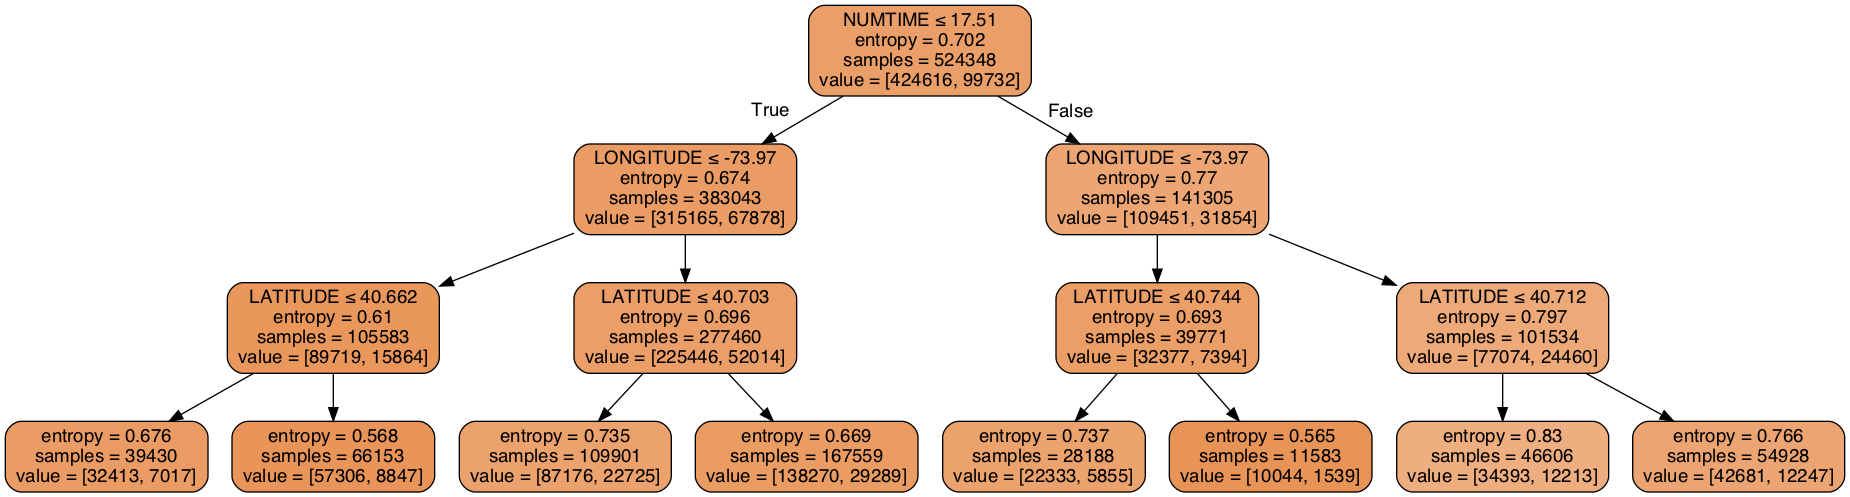

In [17]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
conda install graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


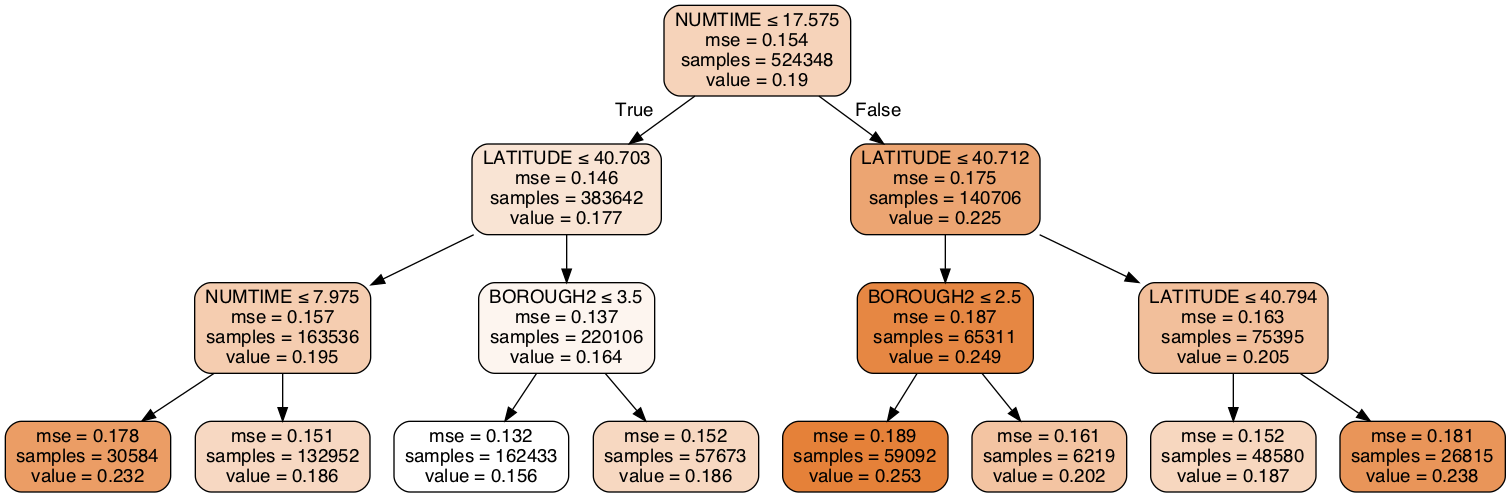

In [19]:
X_feat = data[['NUMTIME','LATITUDE','LATITUDE','BOROUGH2']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
pd.DataFrame({'feature':['NUMTIME','LATITUDE','LONGITUDE','BOROUGH2'], 'importance':t.feature_importances_})



feature  importance
0    NUMTIME    0.536474
1   LATITUDE    0.081202
2  LONGITUDE    0.282734
3   BOROUGH2    0.099591

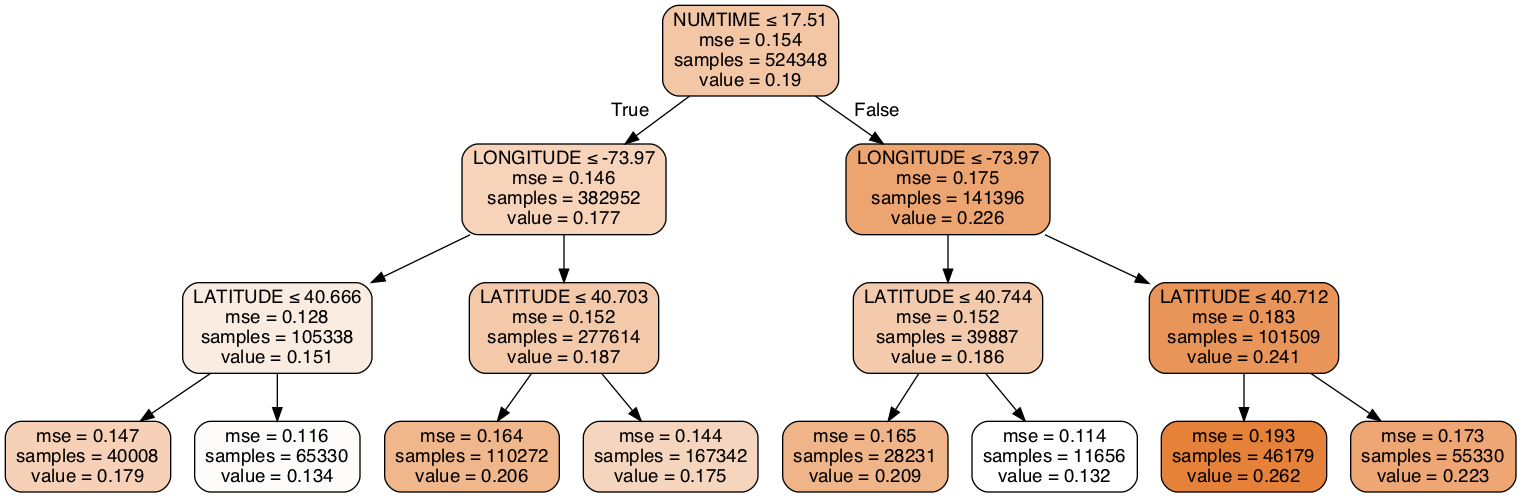

In [21]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.809815
2   0.809815
3   0.809815
4   0.809815
5   0.809815
10  0.808930
15  0.800188
20  0.777920
25  0.750618
30  0.726245


In [23]:
pd.DataFrame({'feature':['NUMTIME','LATITUDE','LONGITUDE'], 'importance':t.feature_importances_})


feature  importance
0    NUMTIME    0.382175
1   LATITUDE    0.323735
2  LONGITUDE    0.294089

In [25]:
#get data
X_feat = data[['NUMTIME','LONGITUDE']]

y = data['affected']

#split into train/test
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,
                                                                          test_size=0.3,
                                                                          random_state=2)

# generate random forest with grid search
rf_slump = RandomForestRegressor(n_estimators=100)

########################################

#train random forests
rf_slump.fit(X_feat_train,y_feat_train)


#get rmse on test set
print("test error for slump: ",np.sqrt(mean_squared_error(y_feat_test,
                                                          rf_slump.predict(X_feat_test))))


KeyboardInterrupt: 

In [ ]:
#get data
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE','BOROUGH2']]

y = data['affected']

#split into train/test
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,
                                                                          test_size=0.3,
                                                                          random_state=2)

# generate random forest with grid search
rf_slump = RandomForestRegressor(n_estimators=100)

########################################

#train random forests
rf_slump.fit(X_feat_train,y_feat_train)


#get rmse on test set
print("test error for slump: ",np.sqrt(mean_squared_error(y_feat_test,
                                                          rf_slump.predict(X_feat_test))))



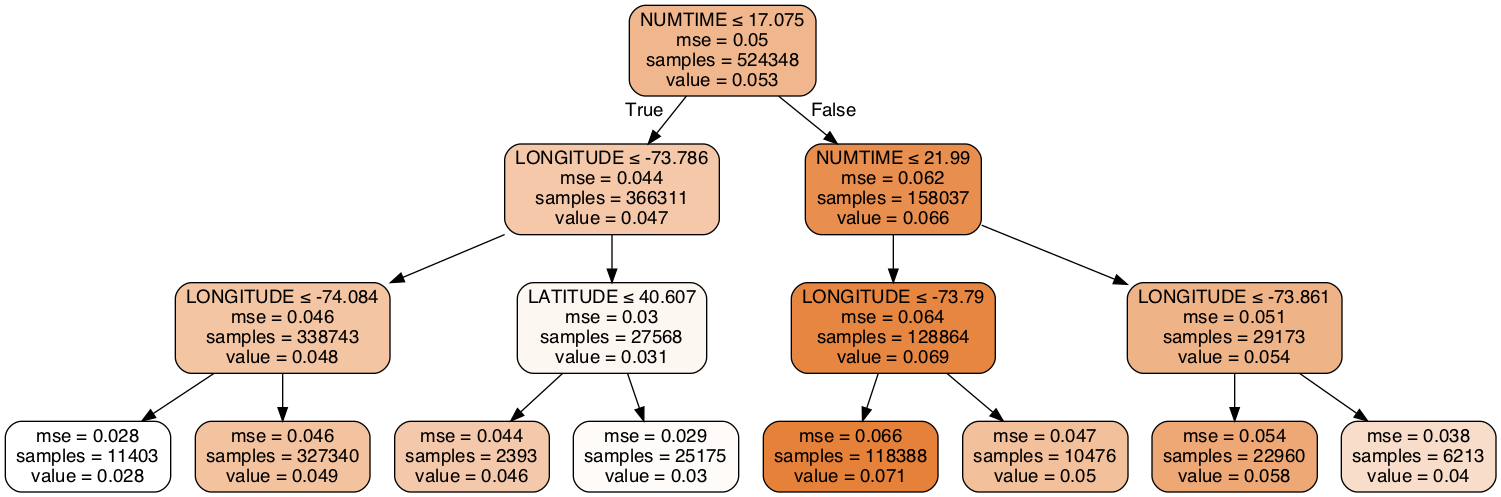

In [25]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.001668
2   0.002157
3   0.002387
4   0.002426
5   0.002340
10 -0.007467
15 -0.060129
20 -0.213922
25 -0.463949
30 -0.724684


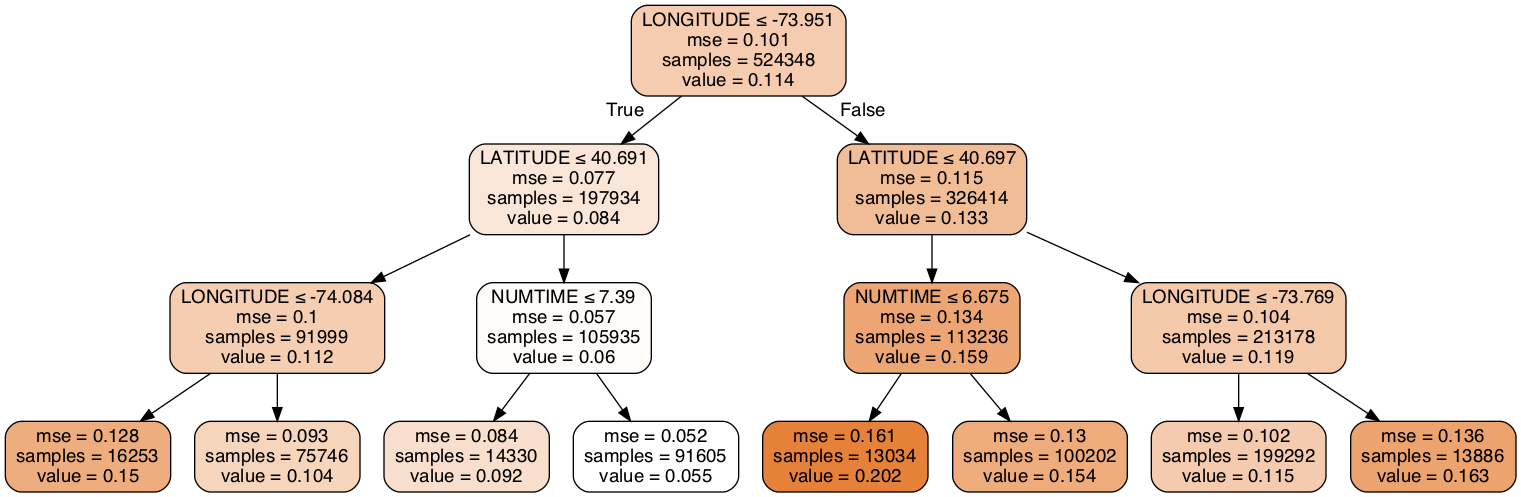

In [27]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeRegressor(max_depth=3,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.005257
2   0.010289
3   0.012058
4   0.013555
5   0.014582
10  0.010477
15 -0.049487
20 -0.228894
25 -0.493302
30 -0.724969


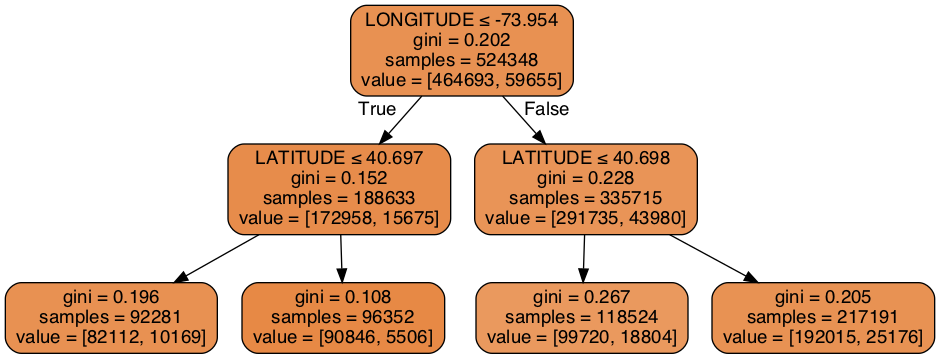

In [29]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.882972
2   0.882972
3   0.882972
4   0.882972
5   0.882972
10  0.881995
15  0.876594
20  0.861048
25  0.837636
30  0.818763


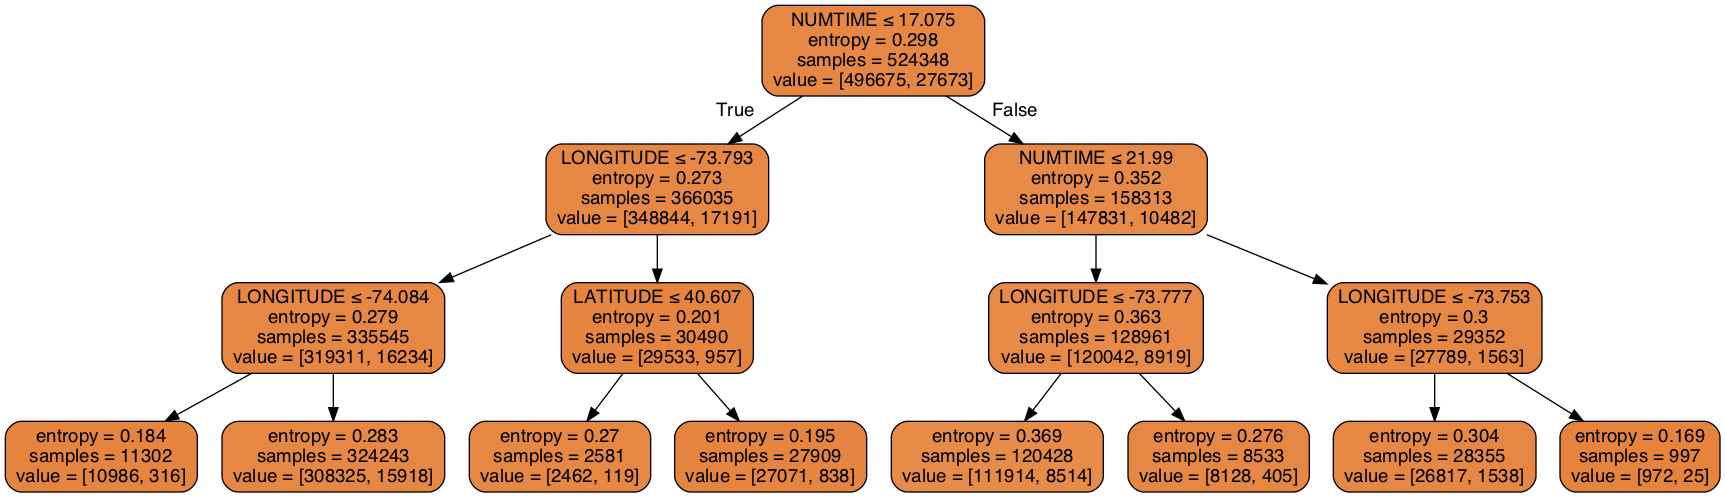

In [31]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.947257
2   0.947257
3   0.947257
4   0.947257
5   0.947257
10  0.946860
15  0.944816
20  0.938484
25  0.928086
30  0.916766


In [33]:
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.05274319541071647


In [35]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF PEDESTRIANS INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.0min finished


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               1                  1                     10   
1         entropy               3                  2                     30   
2         entropy               3                  3                     50   
3         entropy               3                  3                     40   
4         entropy               3                  3                     30   
5         entropy               3                  3                     20   
6         entropy               3                  3                     10   
7         entropy               3                  2                     60   
8         entropy               3                  2                     50   
9         entropy               3                  2                     40   

   mean_test_score  
0         0.947394  
1         0.947394  
2         0.947394  
3         0.947394  
4         0.947394  
5         0.947394  
6         0.947394  
7         0.947394  
8         0.947394  
9         0.947394

In [36]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF MOTORIST INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.9min finished


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               1                  1                     10   
1         entropy               3                  1                     10   
2         entropy               3                  2                     20   
3         entropy               3                  2                     10   
4         entropy               3                  1                     60   
5         entropy               3                  1                     50   
6         entropy               3                  1                     40   
7         entropy               3                  1                     30   
8         entropy               3                  1                     20   
9         entropy               2                  3                     60   

   mean_test_score  
0         0.885945  
1         0.885945  
2         0.885945  
3         0.885945  
4         0.885945  
5         0.885945  
6         0.885945  
7         0.885945  
8         0.885945  
9         0.885945

In [60]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['affected']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.8min finished


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               1                  1                     10   
1         entropy               3                  2                     20   
2         entropy               2                  1                     60   
3         entropy               2                  2                     10   
4         entropy               2                  2                     20   
5         entropy               2                  2                     30   
6         entropy               2                  2                     40   
7         entropy               2                  2                     50   
8         entropy               2                  2                     60   
9         entropy               2                  3                     10   

   mean_test_score  
0         0.809771  
1         0.809771  
2         0.809771  
3         0.809771  
4         0.809771  
5         0.809771  
6         0.809771  
7         0.809771  
8         0.809771  
9         0.809771

In [85]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF CYCLIST INJURED']
dtc = DecisionTreeClassifier() #Note, you can declare a constant hyperparameter in your model
grid = {'max_depth':[1,2,3,4,5,10,15,20,25,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,40,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=5,verbose=True,return_train_score=False, n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.5min finished


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0         entropy              20                  2                     20   
1            gini               1                  1                     10   
2         entropy               3                  2                     50   
3         entropy               4                  1                     10   
4         entropy               3                  3                     60   
5         entropy               3                  3                     50   
6         entropy               3                  3                     40   
7         entropy               3                  3                     30   
8         entropy               3                  3                     20   
9         entropy               3                  3                     10   

   mean_test_score  
0         0.976193  
1         0.976191  
2         0.976191  
3         0.976191  
4         0.976191  
5         0.976191  
6         0.976191  
7         0.976191  
8         0.976191  
9         0.976191

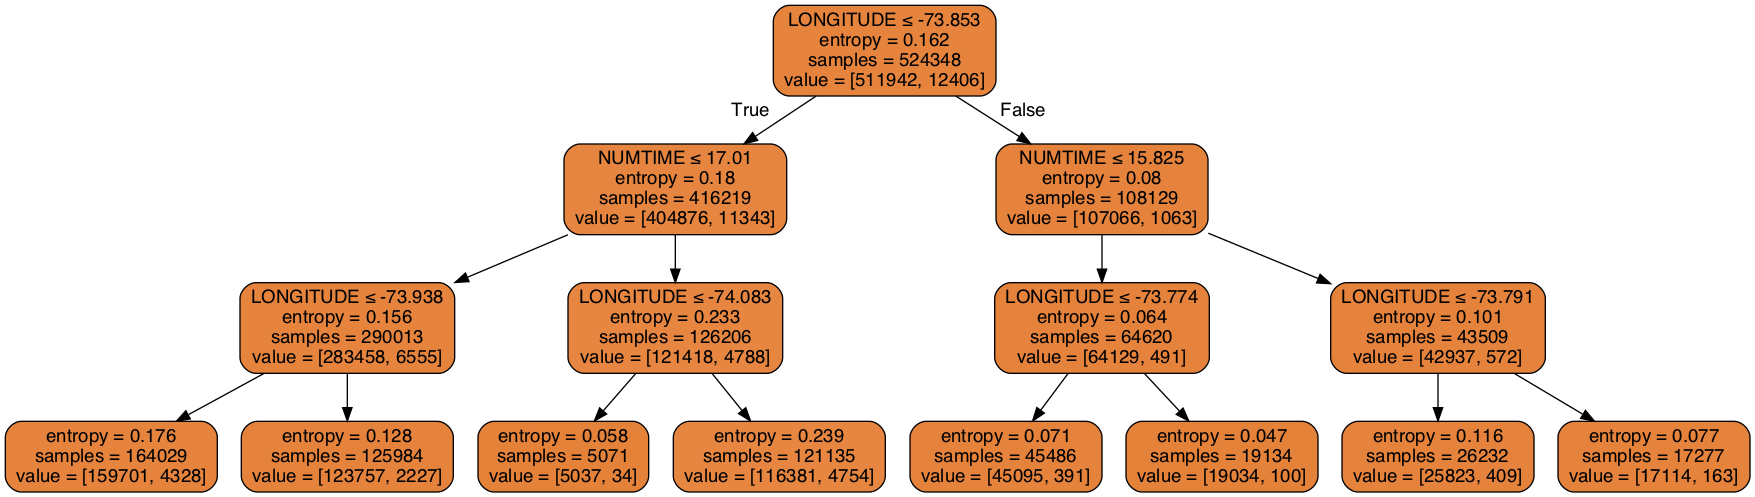

In [13]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=60)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.975536
2   0.975536
3   0.975536
4   0.975528
5   0.975528
10  0.975253
15  0.973430
20  0.967869
25  0.961133
30  0.956236


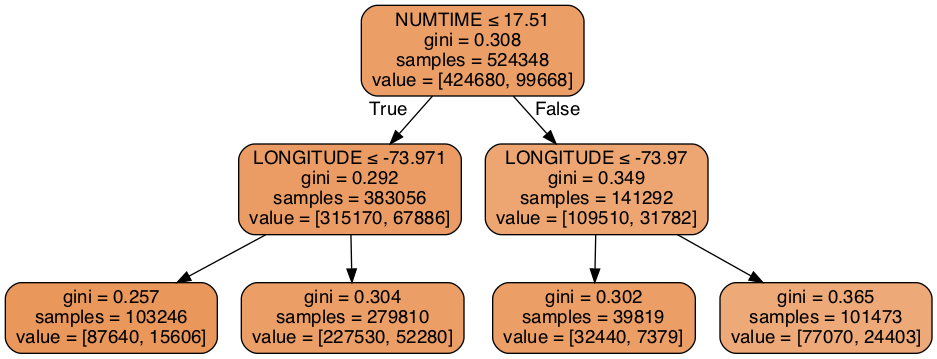

In [15]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.809243
2   0.809243
3   0.809243
4   0.809243
5   0.809243
10  0.808068
15  0.799501
20  0.778119
25  0.752121
30  0.728503


In [17]:
print("Null accuracy on the test set: ",y_test.mean())

Null accuracy on the test set:  0.19075735383864276


In [18]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [1,2,3,4,5,10,15,20,25,30]
accs = []
for i in depths:
    dtc = DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
1   0.002928
2   0.005080
3   0.007145
4   0.008599
5   0.009615
10  0.003992
15 -0.060160
20 -0.245137
25 -0.496213
30 -0.706834


In [19]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Null accuracy on the test set:  0.052933906993775176
Sensitivity/Recall (TPR):  0.9470660930062248
Precision (PPV):  0.9470660930062248


array([[124149,      0],
       [  6939,      0]])

In [20]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Null accuracy on the test set:  0.1902462467960454
Sensitivity/Recall (TPR):  0.8097537532039546
Precision (PPV):  0.8097537532039546


array([[106149,      0],
       [ 24939,      0]])

In [37]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Null accuracy on the test set:  0.11472445990479678
Sensitivity/Recall (TPR):  0.8852755400952033
Precision (PPV):  0.8852755400952033


array([[116049,      0],
       [ 15039,      0]])

In [44]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = DecisionTreeClassifier(max_depth=2,min_samples_leaf=60)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))

Null accuracy on the test set:  0.023915232515562067
Sensitivity/Recall (TPR):  0.976084767484438
Precision (PPV):  0.976084767484438


In [45]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[127953,      0],
       [  3135,      0]])

In [50]:
predicted_probs_t = t.predict_proba(X_test)
predictions_t = t.predict(X_test)
y_test_pred = t.predict(X_test)
y_test_pred = y_test_pred.astype('int32')



fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_test_pred[:,1])


IndexError: too many indices for array

In [121]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF CYCLIST INJURED']
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,test_size=0.2)

dtc = RandomForestClassifier()
grid={'max_depth':[1,2,3,4,5,10,20,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=3,verbose=True,return_train_score=False,n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 15.7min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini              30                  3                     10   
1            gini               1                  1                     10   
2         entropy               3                  3                     50   
3         entropy               3                  1                     20   
4         entropy               3                  1                     30   
5         entropy               3                  1                     50   
6         entropy               3                  1                     60   
7         entropy               3                  2                     10   
8         entropy               3                  2                     20   
9         entropy               3                  2                     30   

   mean_test_score  
0         0.976193  
1         0.976191  
2         0.976191  
3         0.976191  
4         0.976191  
5         0.976191  
6         0.976191  
7         0.976191  
8         0.976191  
9         0.976191

In [67]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(max_depth=30,min_samples_leaf=10)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)

print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    127936
           1       0.00      0.00      0.00      3152

    accuracy                           0.98    131088
   macro avg       0.49      0.50      0.49    131088
weighted avg       0.95      0.98      0.96    131088

Null accuracy on the test set:  0.02404491639204199
Sensitivity/Recall (TPR):  0.975955083607958
Precision (PPV):  0.975955083607958


array([[127936,      0],
       [  3152,      0]])

In [127]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF PEDESTRIANS INJURED']
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,test_size=0.2)

dtc = RandomForestClassifier()
grid={'max_depth':[1,2,3,4,5,10,20,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=3,verbose=True,return_train_score=False,n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 12.9min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini              30                  2                     10   
1            gini               1                  1                     10   
2         entropy               3                  3                     60   
3         entropy               3                  1                     30   
4         entropy               3                  1                     50   
5         entropy               3                  1                     60   
6         entropy               3                  2                     10   
7         entropy               3                  2                     20   
8         entropy               3                  2                     30   
9         entropy               3                  2                     50   

   mean_test_score  
0         0.947395  
1         0.947394  
2         0.947394  
3         0.947394  
4         0.947394  
5         0.947394  
6         0.947394  
7         0.947394  
8         0.947394  
9         0.947394

In [66]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(max_depth=30,min_samples_leaf=10,max_features=2)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)

print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    124122
           1       0.00      0.00      0.00      6966

    accuracy                           0.95    131088
   macro avg       0.47      0.50      0.49    131088
weighted avg       0.90      0.95      0.92    131088

Null accuracy on the test set:  0.05313987550347858
Sensitivity/Recall (TPR):  0.9468601244965215
Precision (PPV):  0.9468601244965215


array([[124122,      0],
       [  6966,      0]])

In [129]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['NUMBER OF MOTORIST INJURED']
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,test_size=0.2)

dtc = RandomForestClassifier()
grid={'max_depth':[1,2,3,4,5,10,20,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=3,verbose=True,return_train_score=False,n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 13.9min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini              10                  1                     10   
1         entropy              10                  3                     20   
2            gini               1                  1                     10   
3         entropy               2                  2                     30   
4         entropy               2                  2                     60   
5         entropy               2                  3                     10   
6         entropy               2                  3                     20   
7         entropy               2                  3                     30   
8         entropy               2                  3                     50   
9         entropy               2                  3                     60   

   mean_test_score  
0         0.885946  
1         0.885946  
2         0.885945  
3         0.885945  
4         0.885945  
5         0.885945  
6         0.885945  
7         0.885945  
8         0.885945  
9         0.885945

In [68]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=20,max_features=3)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94    116249
           1       0.00      0.00      0.00     14839

    accuracy                           0.89    131088
   macro avg       0.44      0.50      0.47    131088
weighted avg       0.79      0.89      0.83    131088

Null accuracy on the test set:  0.11319876724032711
Sensitivity/Recall (TPR):  0.8868012327596729
Precision (PPV):  0.8868012327596729


array([[116249,      0],
       [ 14839,      0]])

In [131]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]
y = data['affected']
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,test_size=0.2)

dtc = RandomForestClassifier()
grid={'max_depth':[1,2,3,4,5,10,20,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,50,60],
        'max_features':[1,2,3]}

gs = GridSearchCV(dtc,grid,cv=3,verbose=True,return_train_score=False,n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 13.1min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0         entropy              10                  2                     10   
1         entropy              30                  3                     60   
2         entropy               3                  1                     20   
3         entropy               2                  2                     30   
4         entropy               2                  2                     50   
5         entropy               2                  2                     60   
6         entropy               2                  3                     10   
7         entropy               2                  3                     20   
8         entropy               2                  3                     30   
9         entropy               2                  3                     50   

   mean_test_score  
0         0.809774  
1         0.809772  
2         0.809771  
3         0.809771  
4         0.809771  
5         0.809771  
6         0.809771  
7         0.809771  
8         0.809771  
9         0.809771

In [69]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['affected']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=10)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)

print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90    106288
           1       0.31      0.00      0.01     24800

    accuracy                           0.81    131088
   macro avg       0.56      0.50      0.45    131088
weighted avg       0.72      0.81      0.73    131088

Null accuracy on the test set:  0.189185890394239
Sensitivity/Recall (TPR):  0.8101504332967167
Precision (PPV):  0.8101504332967167


array([[106128,    160],
       [ 24727,     73]])

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

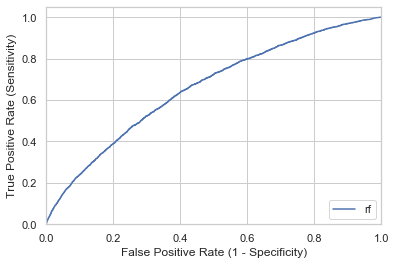

In [41]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)

sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="rf")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

In [12]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)
print("RF model AUC: ",metrics.roc_auc_score(y_test, y_test_pred))


RF model AUC:  0.6641983135750178


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

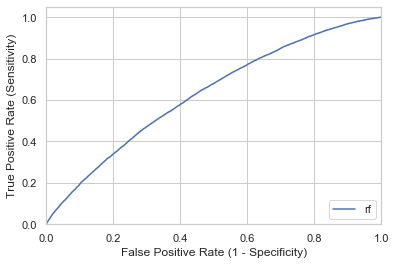

In [42]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,min_samples_leaf=20,max_features=3)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)

sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="rf")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

In [13]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,min_samples_leaf=20,max_features=3)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)
print("RF model AUC: ",metrics.roc_auc_score(y_test, y_test_pred))

RF model AUC:  0.628123237292616


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

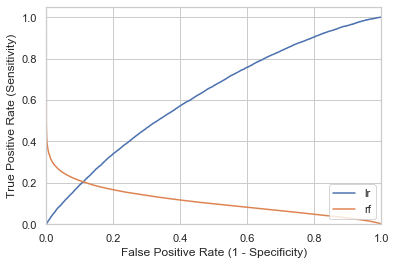

In [64]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10,max_features=2)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)
sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="lr")
sns.mpl.pyplot.plot(fpr_rf, thresholds_rf,label="rf")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

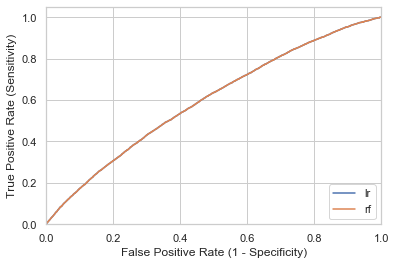

In [62]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10,max_features=2)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)
sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="lr")
sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="rf")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

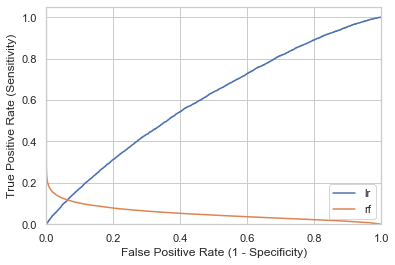

In [61]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10,max_features=2)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)
sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="lr")
sns.mpl.pyplot.plot(fpr_rf, thresholds_rf,label="rf")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

In [16]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10,max_features=2)

t.fit(X_train,y_train)
y_test_pred = t.predict_proba(X_test)[:,1]
new = np.concatenate((y_test.values.reshape(-1,1),y_test_pred.reshape(-1,1)),axis=1)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)
print("RF model AUC: ",metrics.roc_auc_score(y_test, y_test_pred))

RF model AUC:  0.619637207506667


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

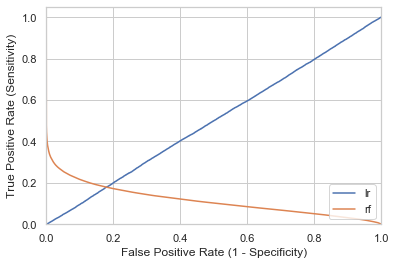

In [60]:
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_test_pred)
sns.mpl.pyplot.plot(fpr_rf, tpr_rf,label="lr")
sns.mpl.pyplot.plot(fpr_rf, thresholds_rf,label="rf")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')


In [ ]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=10,max_features=2)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

predicted_probs_rf = rf.predict_proba(X_test)
predictions_rf = rf.predict(X_test)

y_test_rf_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_rf,predictions_rf.reshape((predictions_rf.shape[0],-1)),
        y_test.values.reshape((y_test.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_rf_df.head()
y_test_lr_df["predicted_07"] = (y_test_lr_df.class_1 > 0.7).astype(float)
print(y_test_lr_df.head())
print("Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted),"\n")
print("Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                          y_test_lr_df.predicted),"\n")
print("Confusion matrix at 0.7 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted_07),"\n")
print("Classification Report at 0.7 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                 y_test_lr_df.predicted_07))

In [58]:
estimator = t.estimators_[5]
dot_data = StringIO()  
export_graphviz(estimator, out_file=dot_data,  
                     feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

KeyboardInterrupt: 

In [34]:
X_feat = data[['NUMTIME','LATITUDE','LONGITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)
y_test_rf_df = pd.DataFrame(np.concatenate((y_test_pred,y_test.values.reshape(y_test.shape[0],1),y_test.reshape(y_test.sjape[0],1)),axis=1),columns = ["class_0","class_1","predicted","actual"])
y_test_lr_df["predicted_07"] = (y_test_lr_df.class_1 > 0.7).astype(float)
y_test_lr_df.class_1.hist(by= y_test_lr_df.actual, sharex=True, sharey=True)



AttributeError: 'Series' object has no attribute 'reshape'

In [32]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF MOTORIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [5,10,20,30]
accs = []
for i in depths:
    dtc = RandomForestClassifier(n_estimators=100,max_depth=i)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
5   0.885443
10  0.885443
20  0.885016
30  0.879096


In [36]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF PEDESTRIANS INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [5,10,20,30]
accs = []
for i in depths:
    dtc = RandomForestClassifier(n_estimators=100,max_depth=i,min_samples_leaf=10,max_features=2)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
5   0.946677
10  0.946677
20  0.946677
30  0.946677


In [37]:
X_feat = data[['NUMTIME','LONGITUDE','LATITUDE']]

y = data['NUMBER OF CYCLIST INJURED']

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)

depths = [5,10,20,30]
accs = []
for i in depths:
    dtc = RandomForestClassifier(n_estimators=100,max_depth=i,min_samples_leaf=10)
    dtc.fit(X_train,y_train)
    accs.append(dtc.score(X_test,y_test))
    
print('Scores:\n',pd.DataFrame({'Accuracy':accs},index=depths))

Scores:
     Accuracy
5   0.976581
10  0.976581
20  0.976581
30  0.976581


In [5]:
data = data[['BOROUGH','NUMTIME','LONGITUDE','LATITUDE','CONTRIBUTING FACTOR VEHICLE 1','NUMBER OF PERSONS KILLED','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF PEDESTRIANS INJURED']]
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']
data['PEDESTRIANS_AFFECTED'] = data['NUMBER OF PEDESTRIANS KILLED'] + data['NUMBER OF PEDESTRIANS INJURED']

In [6]:
borough_dummy = data.BOROUGH.str.get_dummies()
data = pd.concat([data,borough_dummy],axis=1)

data = data.dropna()
data = data[data.LONGITUDE !=0]

data['PERSONS_TF']=0
data.loc[data['PERSONS_AFFECTED'] > 0, 'PERSONS_TF']= 1
data.loc[data['PERSONS_AFFECTED'] == 0, 'PERSONS_TF']= 0

KeyboardInterrupt: 

In [ ]:
value_counts = data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts(ascending=True)
remove = value_counts[value_counts <= 20].index
data = data[~data['CONTRIBUTING FACTOR VEHICLE 1'].isin(remove)]

data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing Too Closely','Unsafe Lane Changing','Passing or Lane Usage Improper','Turning Improperly','Traffic Control Disregarded','Driver Inexperience','Reaction to Uninvolved Vehicle','Unsafe Speed','Fatigued/Drowsy','Alcohol Involvement','Lost Consciousness','Aggressive Driving/Road Rage','Fell Asleep','Illnes','Drugs (illegal)','Drugs (Illegal)','Texting','Outside Car Distraction','Passenger Distraction','Prescription Medication','Failure to Keep Right','Illness','Other Electronic Device','Cell Phone (hand-Held)','Cell Phone (hands-free)','Eating or Drinking','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Physical Disability','Reaction to Other Uninvolved Vehicle','Using On Board Navigation Device','Tinted Windows','Vehicle Vandalism','Cell Phone (hand-held)'],'Human')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Other Vehicular','Oversized Vehicle','Brakes Defective','Steering Failure','Tire Failure/Inadequate','Driverless/Runaway Vehicle','Accelerator Defective','Other Lighting Defects','Tow Hitch Defective','Headlights Defective','Windshield Inadequate'],'Vehicular')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Pavement Slippery','View Obstructed/Limited','Glare','Obstruction/Debris','Pavement Defective','Animals Action','Lane Marking Improper/Inadequate','Traffic Control Device Improper/Non-Working','Shoulders Defective/Improper'],'Environmental')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['80'],'Unspecified')

In [ ]:
factor_dummy = data['CONTRIBUTING FACTOR VEHICLE 1'].str.get_dummies()
data = pd.concat([data,factor_dummy],axis=1)

In [4]:
pred = list(zip(data['NUMTIME'],data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp = data['PERSONS_TF']
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

KeyError: 'MANHATTAN'